<div style="font-size: 16px;">
    <strong>Project 1 information:</strong><br/>
    Topic: Data Mining:<br/>
    Example report: <a href="./SampleReport.pdf" target="_blank">here</a><br/>
    Preprocessing, duplicate detection, missing information, include feature reduction/selection<br/>
    Include N-fold cross validation<br/>
    Create predicitive model, make observations, reference hw1<br/>
    <br/>
    <strong>Final project information:</strong><br/>
    Topic: <a href="https://www.ibm.com/cloud/learn/text-mining">Text Mining</a>
</div>

<div style="font-weight: bold; font-size: 2rem; padding-top: 20px; margin: 20px 0; border-top: 2px solid #000;">
    Section 1.1: Artificial Neuron Model 
</div>
<div style="font-size: 1.5rem; line-height: 2.5rem; padding-bottom: 30px; border-bottom: 2px solid #000;">
    <strong>McCulloch-Pitts Model:</strong><br/>
    <img style="height: 400px;" src="./neuron.png"/><br/>
    <br/>
    <strong>Perceptron Classifier:</strong><br/>
    <img style="height: 400px;" src="./neuron2.png"/><br/>
    <br/>
    <strong>Note:</strong> classifier strictly creates a line, dividing a positive and negative region
    all values fall on 1 or -1 based on this classifier<br/>
    <strong>Perceptron Learning Algorithm</strong><br/>
    Weights of a classifier, determined by alogrithm<br/>
    <strong>Error Correction Algorithm</strong><br/>
    weight values are updated only when the classifier makes an error on given example<br/>
    normalizing data can result in working to make all training samples produce a positive class rather than
    a positive and negative class.<br/>
    (reduces complexity, helps with math)<br/>
    any solution for the weight is called a <strong>Solution Vector</strong><br/>
    If linear separation is a problem:<br/>
    Go for error minimization rather than correction or use layers of perceptrons<br/>
    <br/>
    <strong>Sigmoidal Neuron:</strong><br/>
    <img style="height: 200px;" src="./neuron3.png"/><br/>
    <br/>
    In MSE (mean square error) loss function, the focus is on difference
    between the desired output and the output of the summation feeding into the
    sigmoidal activation <br/>
</div>

${\displaystyle{
    \frac{\delta J_i}{\delta w} = -(y_i - w^tx_i)x_i \\
    w_{new} = w_{old} + \alpha (y_i - w^t_{old}x_i)x_i \\
    \text{This leads to a single input equating to: } \\
    \frac{\delta J_i}{\delta w} = (y_i - \hat{y}_i) * (\hat{y}_i * (1 - \hat{y}_i)) * x_i \\
    \text{where } (y_i - \hat{y}_i) \text{ = error}
}}$

<div style="padding-top:20px;">
    
</div>

W-New: (0,0); [0.30036814 0.20073629 0.60073629]
W-New: (0,1); [0.30104508 0.20276709 0.60141322]
W-New: (0,2); [0.30107473 0.20285605 0.60153183]
W-New: (0,3); [0.30039105 0.200805   0.60426657]
W-New: (0,4); [0.29856541 0.19897936 0.60791784]
W-New: (0,5); [0.2983903  0.19862914 0.60879339]
error -0.08761857731269952
W-New: (1,0); [0.29875067 0.19934989 0.60951413]
W-New: (1,1); [0.29942466 0.20137184 0.61018812]
W-New: (1,2); [0.29945271 0.201456   0.61030032]
W-New: (1,3); [0.29880866 0.19952384 0.61287652]
W-New: (1,4); [0.2970199  0.19773508 0.61645404]
W-New: (1,5); [0.29685848 0.19741225 0.61726114]
error -0.08395533777234554
[ 1.92620525  1.50635636  3.35813977 -1.57994933 -0.74025155 -2.39462271]


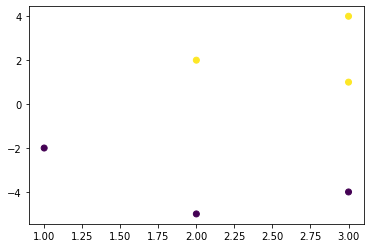

In [16]:
import numpy as np
from numpy import linalg as LA
import math
import matplotlib.pyplot as plt

X = np.array([[1,2,2],[1,3,1],[1,3,4],[1,3,-
4],[1,1,-2],[1,2,-5]])
Y = np.array([1,1,1,0,0,0])
alpha = 0.025
w_old = np.array([0.3,0.2,0.6])
for i in range (2):
    for j in range(6):
        net = np.matmul(w_old,X[j].T)
        out = 1/(1+np.exp(-net))
        err = (Y[j]-out)
        grad_old = err*out*(1-out)*X[j]
        w_new = w_old + alpha*grad_old
        print('W-New: ({},{}); {}'.format(i, j, w_new))
        w_old = w_new
    print('error {}'.format(err))
print(np.matmul(w_old,X.T))
# plt.plot(xp,yp)
plt.scatter(X[:,1],X[:,2], c = Y[:])
plt.show()


<div style="font-weight: bold; font-size: 2rem; padding-top: 20px; margin: 20px 0; border-top: 2px solid #000;">
    Section 1.2: Neural Training 
</div>
<div style="font-size: 1.5rem; line-height: 2.5rem; padding-bottom: 30px; border-bottom: 2px solid #000;">
    Gradient of internal layer is fed backwards to train ad adjust weights. <br/>
    Based on chain-rule differentiation (calculus), and results in 
    <a href="./BackPropDerivation.pdf">"Back Propagation"</a><br/>
    Works in two phases: Feedfoward, and Backpropogation.<br/>
    <strong>FeedForward</strong><br/>
    computes weighted sums to give some output, fed back into sum and recalculated<br/>
    Note: sklearn MLPClassifier docs: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">here</a>
</div>

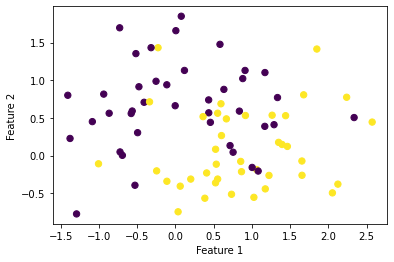

In [4]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y =  make_moons(n_samples=100, noise=0.50, random_state=3)
# Takes arrays, splits them into two arrays, size depending on test_size, used to split data 
# essentially takes random slices of arrays testing random samples, random state allows
# for replicatable results
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

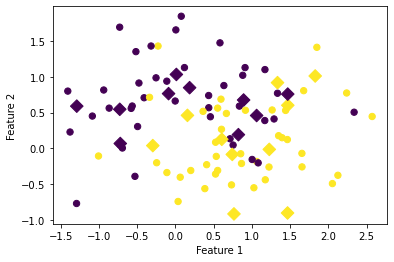

In [20]:
# Activation types: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
# Solvers: {‘lbfgs’, ‘sgd’, ‘adam’}
mlp = MLPClassifier(hidden_layer_sizes=10, activation="logistic", learning_rate_init=0.05,
                   batch_size=10, solver="lbfgs", random_state=0, max_iter=1500).fit(X_train, y_train)
result = mlp.predict(X_test)
marker = np.append(y_train, result, axis=0)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40)
plt.scatter(X_test[:, 0], X_test[:, 1], c=result, marker="D", s=80)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

<ipython-input-22-71d159a6d452>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


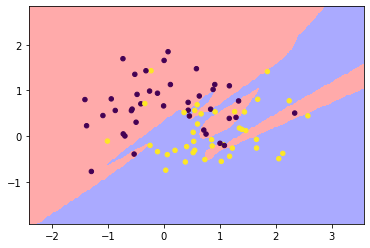

In [22]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)
plt.show()



<div style="font-weight: bold; font-size: 2rem; padding-top: 20px; margin: 20px 0; border-top: 2px solid #000;">
    Section 1.2: Decision Tree Classification 
</div>
<div style="font-size: 1.5rem; line-height: 2.5rem; padding-bottom: 30px; border-bottom: 2px solid #000;">
    Scale each attribute to a binary attribute. <br/>
    process consists of growing and then pruning.<br/>
    <strong>Growth phase</strong> searches for successive splits to divide training data into<br/>
    smaller subsets of increasing purity/homogeneity in a top-down greedy manner<br/>
    Splitting is generally done by finding an attribute-value pair that maximizes some purity 
    criteria<br/>
    <ul>Algorithms
        <li>AMIG</li>
        <li>CART</li>
        <li>ID3, C4.5</li>
        <li>Perceptron trees</li>
    </ul><br/>
    <strong>Entropy Equation</strong>
</div>

${\displaystyle{
    \Delta E(s) = E - p_{left}E_{left} - p_{right}E_{right} \\
    E = -\sum_{j=1}^Mp_j\ln =p_j \\
    \text{where M = number of classes and } p_j \text{ = fraction of samples in class in that area} \\
    \text{ex: we have 5 samples, 3x, 2y and } a_1 \text{ is our dividing line.} \\
    \text{left of } a_1 \text{ are 2 samples, x, y. right of } a_1 \text{ are 3 samples 2x, y} \\
    \text{to calculate } E(s_1) \text{ :} \\
    E = -\frac{2}{5} \ln (\frac{2}{5}) - \frac{3}{5} \ln (\frac{3}{5}) = .6730 \\
    p_{left} = 2/5 \\
    E_{left} = -\frac{1}{2} \ln (\frac{1}{2}) - \frac{1}{2} \ln (\frac{1}{2}) = .6983 \\
    p_{right} = 3/5 \\
    E_{right} = -\frac{1}{3} \ln (\frac{1}{3}) - \frac{2}{3} \ln (\frac{2}{3}) = .6365 \\ 
    E(s_1) = .6730 - (.4 * .6983) - (.6 * .6365) = 0.0138 \\
    \text{we would then repeat, and choose a line where } E(s_i) \text{ is maximized}
}}$
